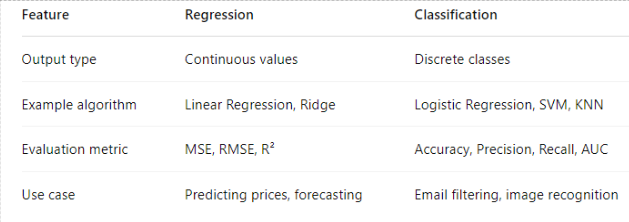

**Classification**

**Goal: Predict discrete labels or categories.**

**Think: "Which class?", "What type/category?"**



# Regression

**Goal: Predict continuous numeric values.**

**Think: "How much?", "What is the value?"**

# Logistic Regression

**Activation Functions use Sigmoid (Binary) / Softmax (Multi-class)**

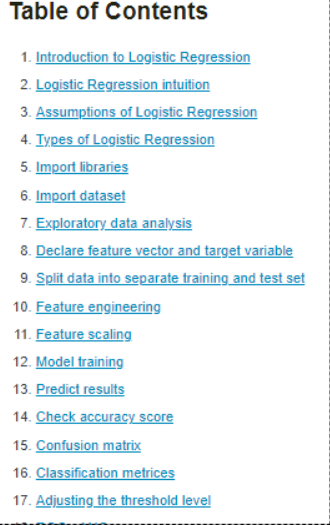

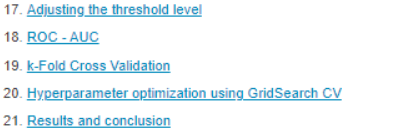

# 1. Introduction to Logistic Regression


When data scientists may come across a new classification problem, the first algorithm that may come across their mind is Logistic Regression. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. Logistic Regression is also called Logit Regression. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

# **2. Logistic Regression intuition **


In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

The Logistic Regression algorithm works as follows -

# Implement linear equation
Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.

If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

In [130]:
# z = β0 + β1x1

Here, the coefficients β0 and β1 are the parameters of the model.

If there are multiple explanatory variables, then the above equation can be extended t

In [131]:
# z = β0 + β1x1+ β2x2+……..+ βnxn

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

# Sigmoid Function
This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

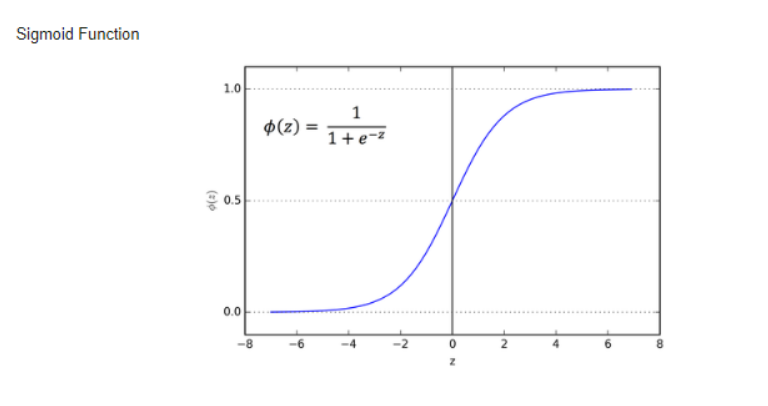

# What is Softmax?
Softmax is an activation function used in multi-class classification problems.
It converts raw scores (logits) into probabilities that sum up to 1.

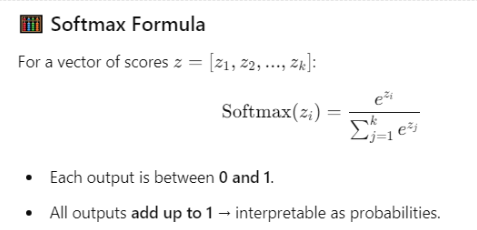

# Decision boundary
The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below

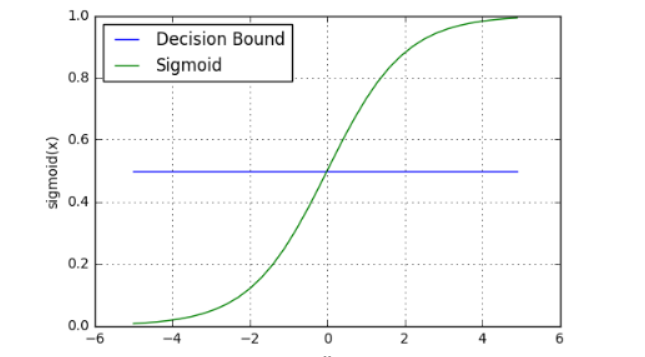

# Making predictions
Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0

# 3. Assumptions of Logistic Regression


The Logistic Regression model requires several key assumptions. These are as follows:-

Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

Logistic Regression model assumes linearity of independent variables and log odds.

The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

# 4. Types of Logistic Regression


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

1. Binary Logistic Regression
In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. Multinomial Logistic Regression
In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. Ordinal Logistic Regression
In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent

**Load and explore the dataset (EDA).**

**Preprocess the data.**

**Train a Logistic Regression model.**

**Perform cross-validation**.  

**Tune hyperparameters using GridSearchCV**.

**Evaluate using metrics like Accuracy, Precision, Recall**, **F1-Score, and Confusion Matrix.**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [134]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [135]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [136]:
df = df[['v1', 'v2']]  # Keep only the relevant columns
df.columns = ['label', 'text']

In [137]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [138]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


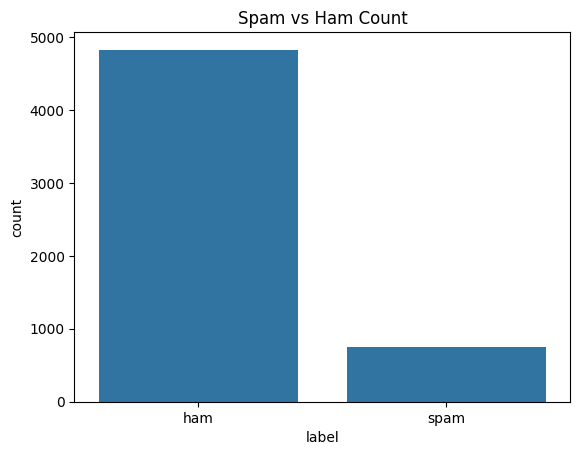

In [139]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.show()

**# Check for missing values**

In [140]:
df.isnull().sum()

,0
label,0
text,0


In [141]:
# Encode label (ham=0, spam=1)
df['label'] = LabelEncoder().fit_transform(df['label'])

<ipython-input-141-6ce0518ae94e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = LabelEncoder().fit_transform(df['label'])


In [142]:
# df['label'].value_count()
df['label'].value_counts()

,count
label,
0,4825
1,747


In [143]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [144]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [145]:
# Create a pipeline with CountVectorizer and Logistic Regression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('log_reg', LogisticRegression(solver='liblinear'))
])

In [146]:
pipeline

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [147]:
# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)



Cross-Validation Accuracy Scores: [0.98318386 0.98654709 0.98428732 0.97867565 0.97979798]


In [148]:
print("Mean CV Accuracy:", np.mean(cv_scores))

Mean CV Accuracy: 0.9824983768929958


In [149]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'vectorizer__max_df': [0.9, 1.0],
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2']
}

In [150]:
param_grid

{'vectorizer__ngram_range': [(1, 1), (1, 2)],
 'vectorizer__max_df': [0.9, 1.0],
 'log_reg__C': [0.01, 0.1, 1, 10],
 'log_reg__penalty': ['l1', 'l2']}

In [151]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [152]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.01, 0.1, 1, 10],
                         'log_reg__penalty': ['l1', 'l2'],
                         'vectorizer__max_df': [0.9, 1.0],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [153]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.01, 0.1, 1, 10],
                         'log_reg__penalty': ['l1', 'l2'],
                         'vectorizer__max_df': [0.9, 1.0],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [154]:
print("\nBest Parameters:", grid.best_params_)


Best Parameters: {'log_reg__C': 10, 'log_reg__penalty': 'l2', 'vectorizer__max_df': 0.9, 'vectorizer__ngram_range': (1, 1)}


In [155]:
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Cross-Validation Accuracy: 0.9847417875818474


In [156]:
# Evaluate on test data
best_model = grid.best_estimator_

In [157]:
best_model

Pipeline(steps=[('vectorizer', CountVectorizer(max_df=0.9)),
                ('log_reg', LogisticRegression(C=10, solver='liblinear'))])

In [158]:
y_pred = best_model.predict(X_test)

In [159]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [160]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.979372197309417


In [161]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [162]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[963   2]
 [ 21 129]]


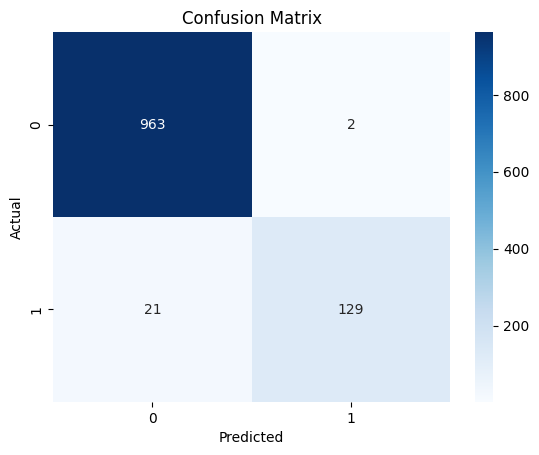

In [163]:
# Optional: Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()